# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Sasha Nabila Fortuna
- **Email:** sashanabilafortuna@gmail.com
- **ID Dicoding:** rkivem

## Menentukan Pertanyaan Bisnis

- Which station has the highest pollutant levels, and what are the most prevalent pollutants in that station?
- What is the distribution of wind directions across all stations, and how does it correlate with pollutant levels?
- Are there any notable trends or patterns in pollutant levels over different months (and visualize per hours)?
- What is the correlation between weather variables (e.g. temperature, pressure, humidity) and pollutant levels across all stations?

## Import Semua Packages/Library yang Digunakan

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install streamlit -q

In [3]:
%%writefile app.py

Writing app.py


In [3]:
!wget -q -O - ipv4.icanhazip.com

34.80.249.230


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.249.230:8501

npx: installed 22 in 2.657s
your url is: https://mighty-eyes-rhyme.loca.lt


In [10]:
!pip install pipreqsnb

In [11]:
!pipreqsnb ./

pipreqs  ./
INFO: Not scanning for jupyter notebooks.


## Data Wrangling

### Gathering Data

> Download from google drive

In [5]:
!gdown "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100% 7.96M/7.96M [00:00<00:00, 11.4MB/s]


In [6]:
!unzip "/content/Air-quality-dataset.zip"

Archive:  /content/Air-quality-dataset.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-201702

In [7]:
# Path to the folder containing the CSV files
folder_path = '/content/PRSA_Data_20130301-20170228/'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty dictionary to store DataFrames
dfs = {}

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    # Generate a key for the DataFrame based on the file name
    key = file.split('.')[0]
    # Read the CSV file into a DataFrame
    dfs[key] = pd.read_csv(os.path.join(folder_path, file))

In [8]:
# Combine all DataFrames into a single DataFrame
df_all = pd.concat(dfs.values(), ignore_index=True)

# Print the combined DataFrame
df_all.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [9]:
# See columns in DataFrame
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [10]:
# See statistics description for df_all
df_all.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


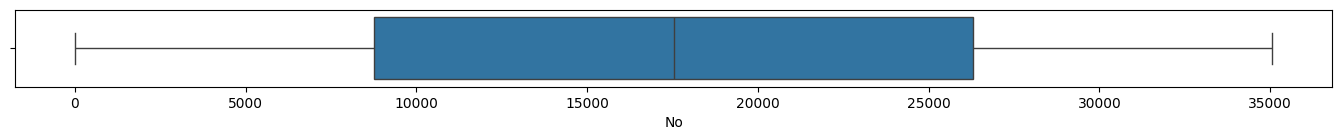

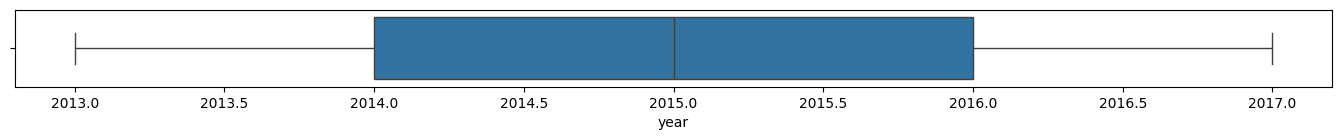

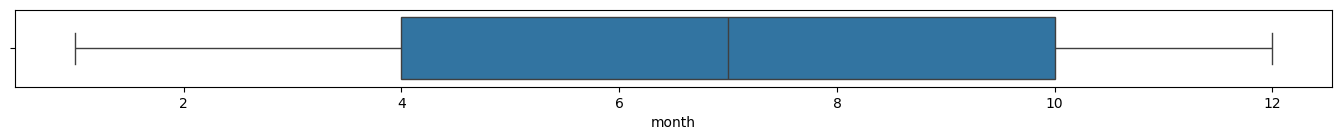

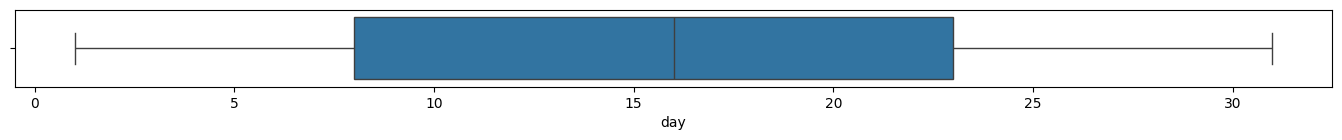

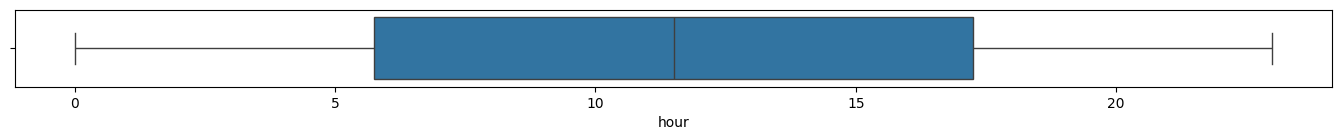

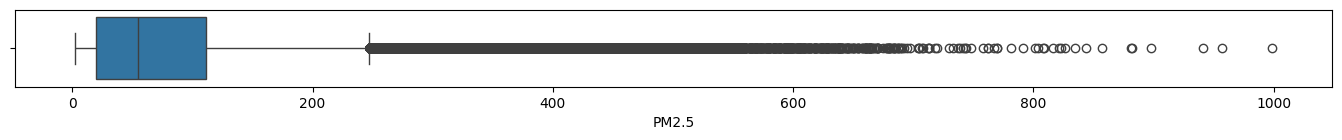

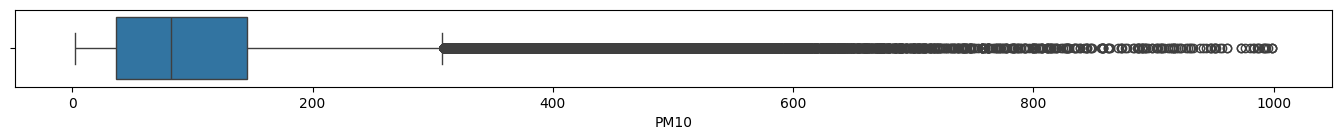

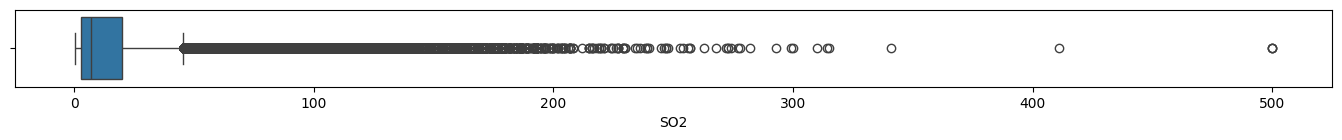

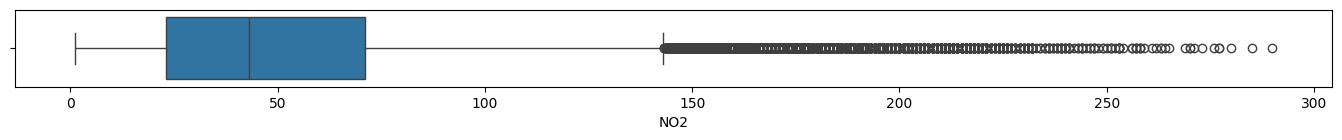

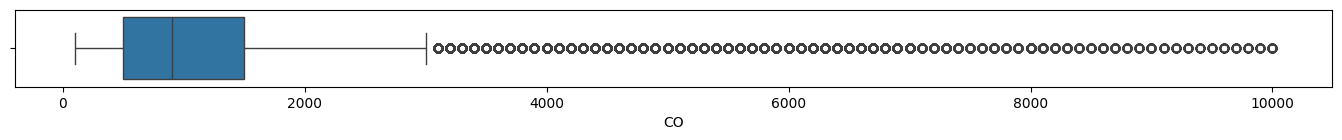

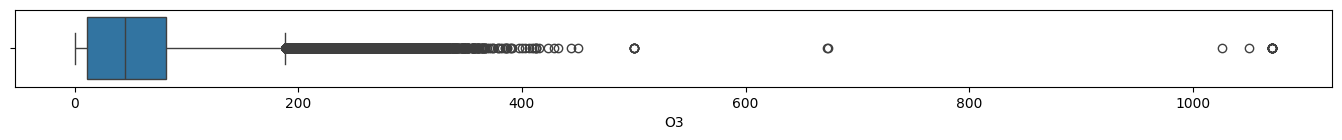

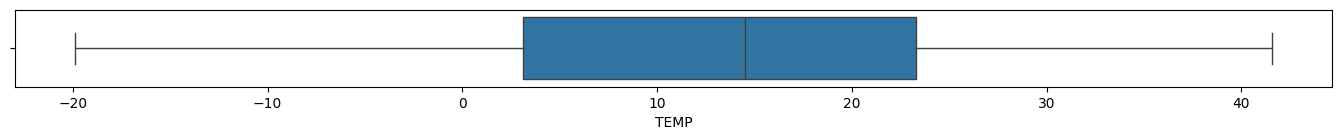

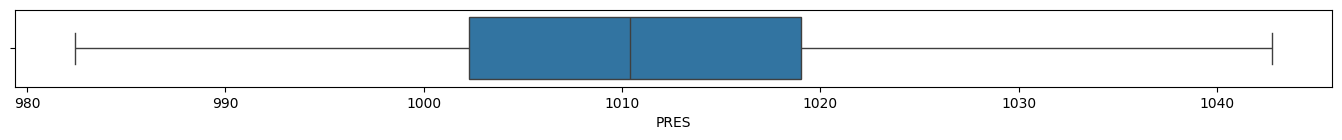

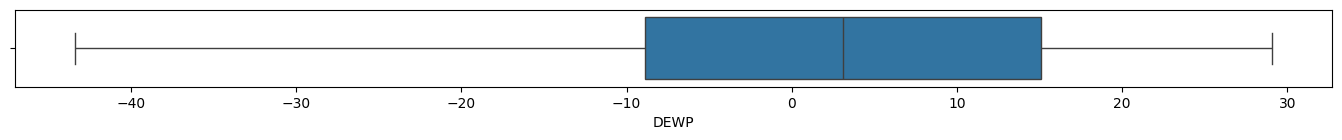

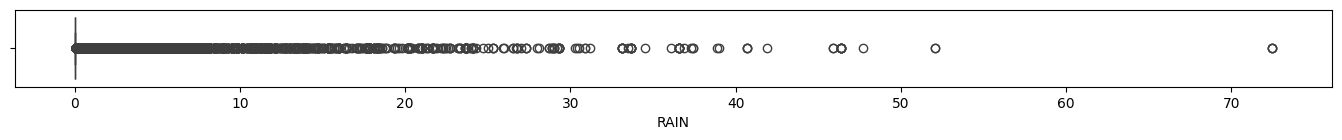

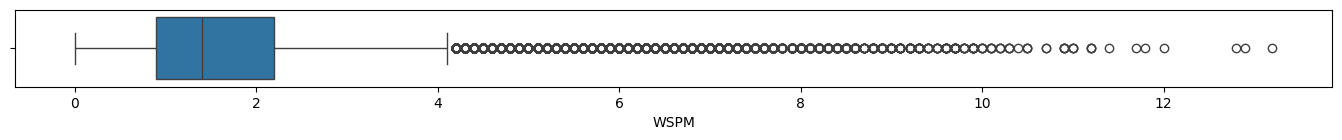

In [11]:
# Boxplot Visualization (quantitative features)
df1=df_all.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [12]:
# Numbers of duplicated data
duplicated_row = df_all[df_all.duplicated(keep='first')]
print(f"Banyak row dengan redundansi data: {len(duplicated_row)}")
duplicated_row

Banyak row dengan redundansi data: 0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


> `df_all` has no duplicated data

In [13]:
# See how many missing values per columns
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

null_col = cek_null(df_all)
null_col

,Total,Percent
CO,20701,4.919813
O3,13277,3.155421
NO2,12116,2.879497
SO2,9021,2.143937
PM2.5,8739,2.076916
PM10,6449,1.532674
wd,1822,0.433018
DEWP,403,0.095777
TEMP,398,0.094589
PRES,393,0.093401


### Cleaning Data

> I use median based on the data distribution on boxplot and it seems skewed distribution for all numeric variables with missing values.

In [14]:
# List of numeric columns
numeric_columns = null_col.index.tolist()

# Exclude string/object type columns
numeric_columns = [col for col in numeric_columns if df_all[col].dtype != 'object']

# Impute numeric columns with median
for column in numeric_columns:
    median_value = df_all[column].median()
    df_all[column].fillna(median_value, inplace=True)

In [15]:
# Check column(s) with missing values
cek_null(df_all)

,Total,Percent
wd,1822,0.433018


> We know there's only left 1 variable with missing values, have datatype string/object. For `wd`, we will impute with mode `wd` per station. It's because we know each places or stations, most likely have the same condition geographically.

In [16]:
# Group by station and find the mode of wd
mode_wind_direction = df_all.groupby('station')['wd'].apply(lambda x: x.mode()[0])

print(mode_wind_direction)

station
Aotizhongxin      NE
Changping        NNW
Dingling         NNW
Dongsi           ENE
Guanyuan          NE
Gucheng            N
Huairou           NW
Nongzhanguan     ENE
Shunyi           NNE
Tiantan          ENE
Wanliu            NE
Wanshouxigong     NE
Name: wd, dtype: object


In [17]:
# Fill missing values in 'wd' column with the mode corresponding to each station
for station, mode in mode_wind_direction.items():
    df_all.loc[(df_all['station'] == station) & (df_all['wd'].isnull()), 'wd'] = mode

In [18]:
cek_null(df_all)

,Total,Percent


> There's no more missing values!!

## Exploratory Data Analysis (EDA)

### Explore ...

> We can get insights thru unique values for each categorial columns

In [19]:
# Number of unique values for each categorical columns
for col in df_all.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(df_all[col].value_counts(),'\n')

No. of unique values in column wd:
NE     43699
ENE    34376
NW     32902
N      31028
E      29752
SW     28756
NNE    28715
NNW    25606
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64 

No. of unique values in column station:
Aotizhongxin     35064
Dongsi           35064
Gucheng          35064
Wanshouxigong    35064
Huairou          35064
Guanyuan         35064
Changping        35064
Nongzhanguan     35064
Tiantan          35064
Dingling         35064
Shunyi           35064
Wanliu           35064
Name: station, dtype: int64 



> From below, we know that each station, are most likely have the same wind direction, based on its geographic situation.

In [20]:
# Mode wind direction per station
mode_wind_direction

station
Aotizhongxin      NE
Changping        NNW
Dingling         NNW
Dongsi           ENE
Guanyuan          NE
Gucheng            N
Huairou           NW
Nongzhanguan     ENE
Shunyi           NNE
Tiantan          ENE
Wanliu            NE
Wanshouxigong     NE
Name: wd, dtype: object

> We can check on the data distribution for each numerical columns. There are some of them have skewed distribution and also (almost) normal distribution. We also find out in some variables have so much outliers. But, I decide to not remove the outliers for the sake of presenting 'factual' data, it is what it is in actual situation.

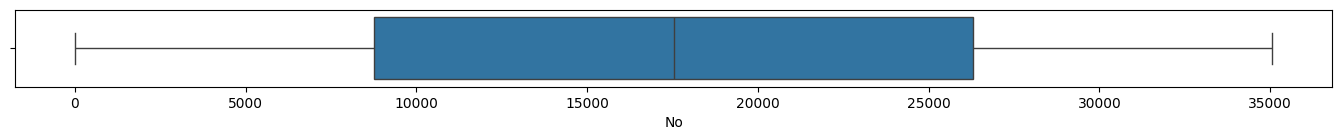

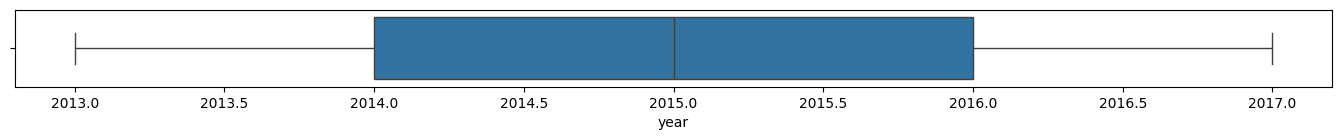

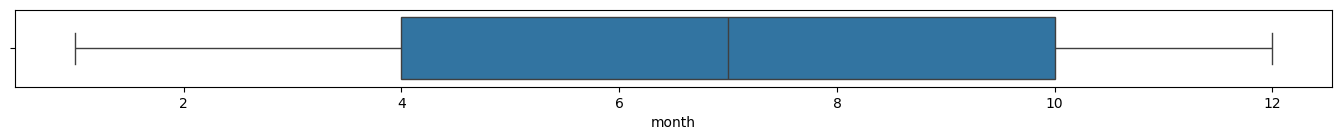

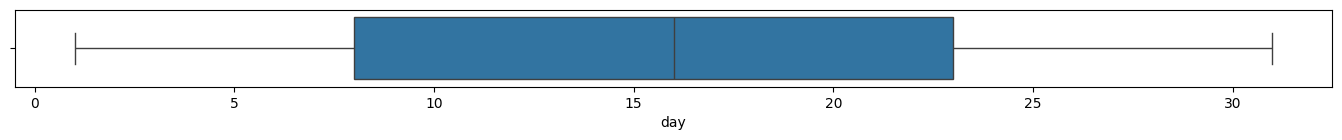

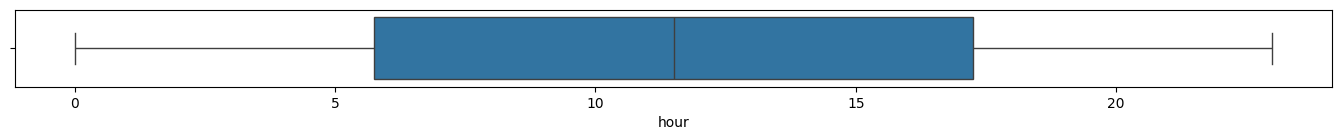

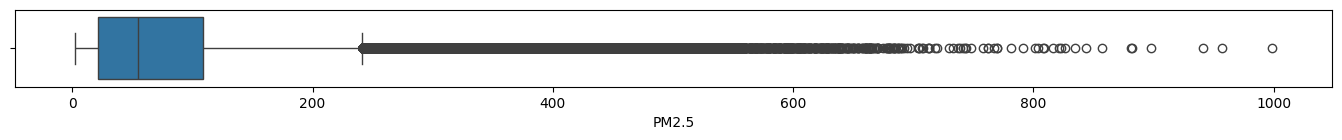

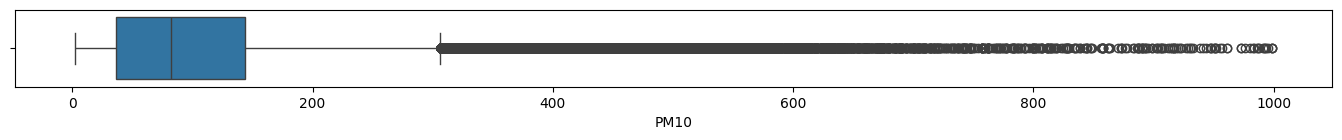

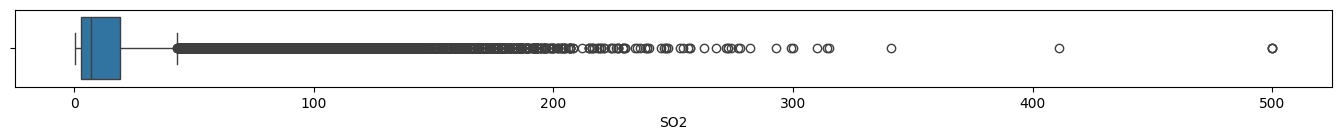

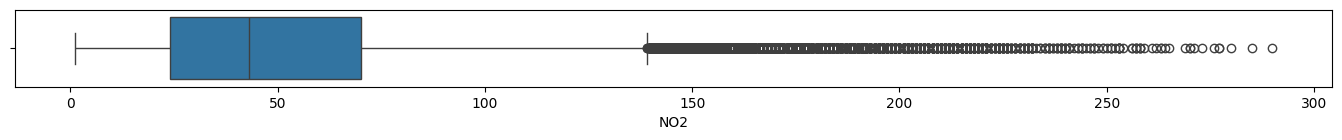

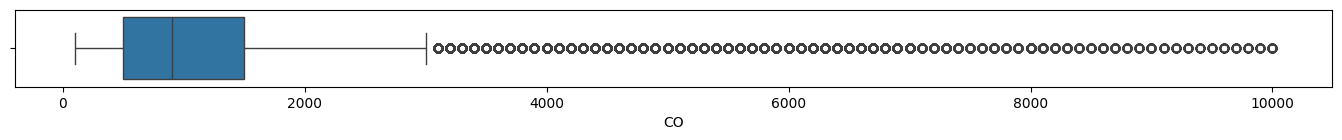

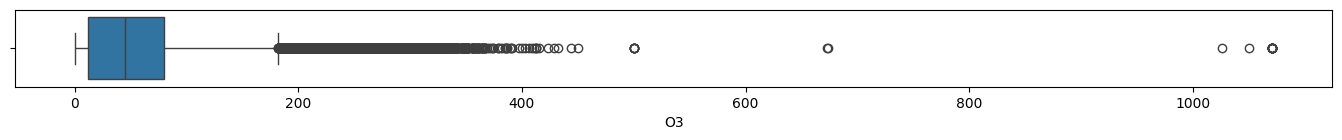

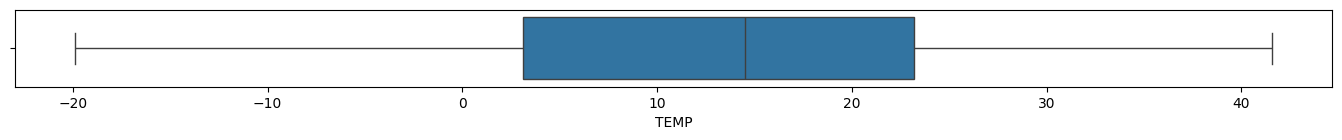

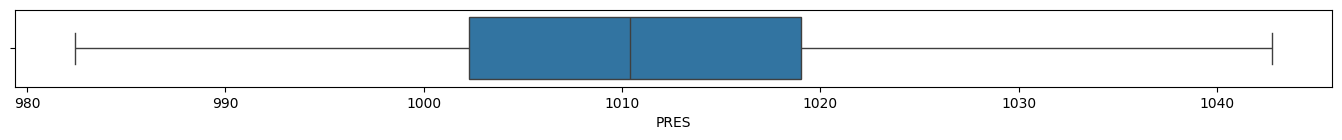

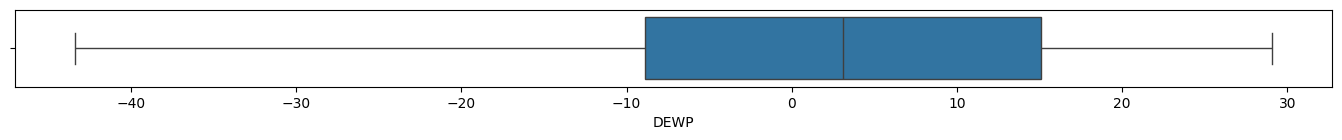

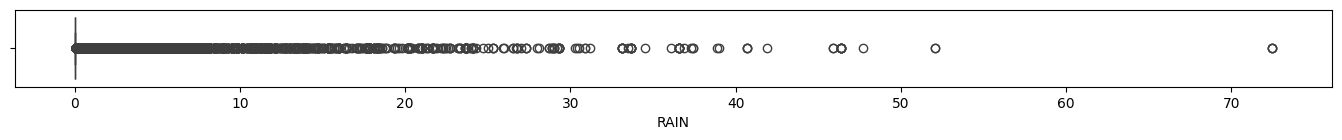

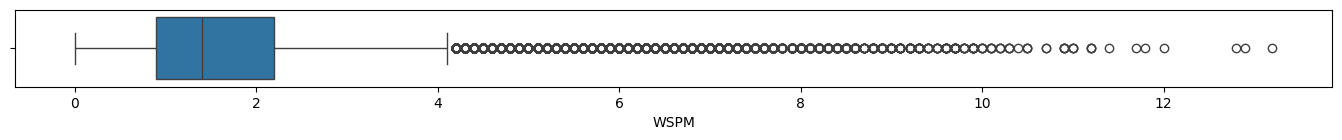

In [21]:
# Boxplot Visualization (quantitative features)
df1=df_all.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

> Use median because for pollutant columns, we know they have skewed distribution.

In [43]:
# Assuming df is your DataFrame containing the pollutant columns
pollutant_columns = ['PM2.5', 'PM10','SO2', 'NO2', 'CO', 'O3']

# Calculate median pollutant levels grouped by station
median_pollutant_levels_per_station = df_all.groupby('station')[pollutant_columns].median()

print("Median pollutant levels per station:")
median_pollutant_levels_per_station

Median pollutant levels per station:


,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,56.0,84.0,8.0000,52.0,900.0,45.0000
Changping,48.0,74.0,7.0000,37.0,800.0,45.0000
Dingling,42.0,62.0,5.9976,20.0,700.0,59.1192
Dongsi,59.0,85.0,9.4248,45.0,900.0,45.0000
Guanyuan,58.0,88.0,8.0000,50.0,900.0,44.0000
Gucheng,58.0,98.0,7.0000,49.0,900.0,45.0000
Huairou,48.0,71.0,4.0000,27.0,800.0,47.0000
Nongzhanguan,57.0,84.0,9.0000,50.0,900.0,45.0000
Shunyi,55.0,79.0,5.1408,39.0,900.0,45.0000


In [28]:
# Export cleaned dataset
df_all.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which station has the highest pollutant levels, and what are the most prevalent pollutants in that station?

> We can visualize all the pollutant in one big visualization. But since each level have different measurement, we need to change our approach to visualize it all.

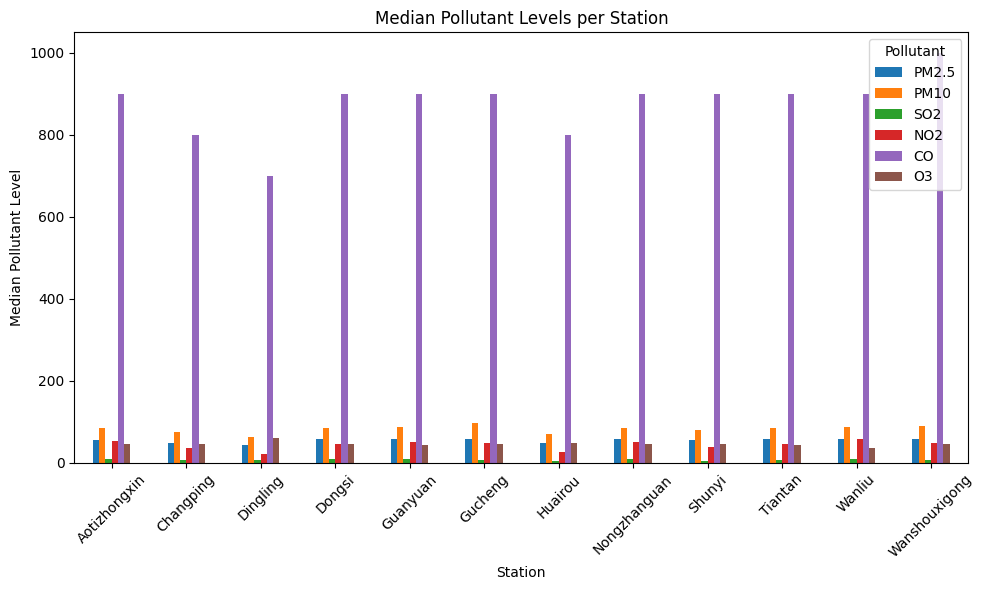

In [44]:
# Plotting
median_pollutant_levels_per_station.plot(kind='bar', figsize=(10, 6))
plt.title('Median Pollutant Levels per Station')
plt.xlabel('Station')
plt.ylabel('Median Pollutant Level')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

> I decide to visualize per pollutants and each pollutants, I show the pollutant level per station in descending order.

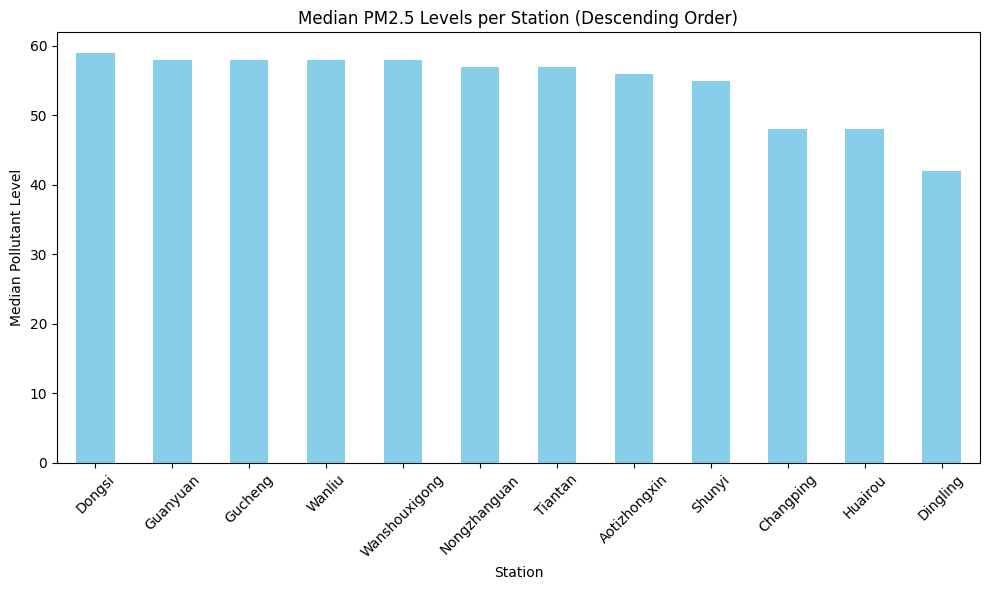

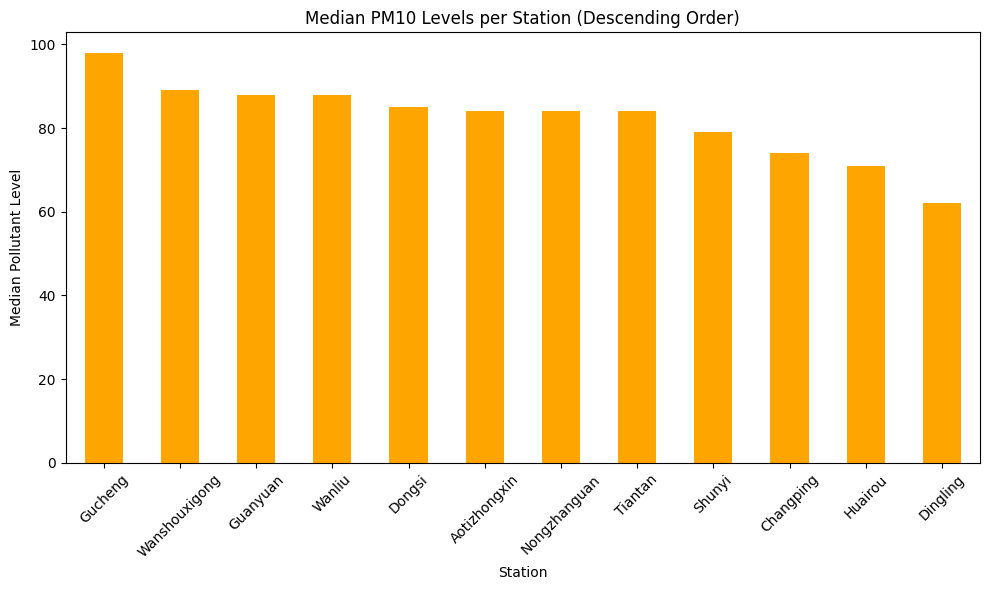

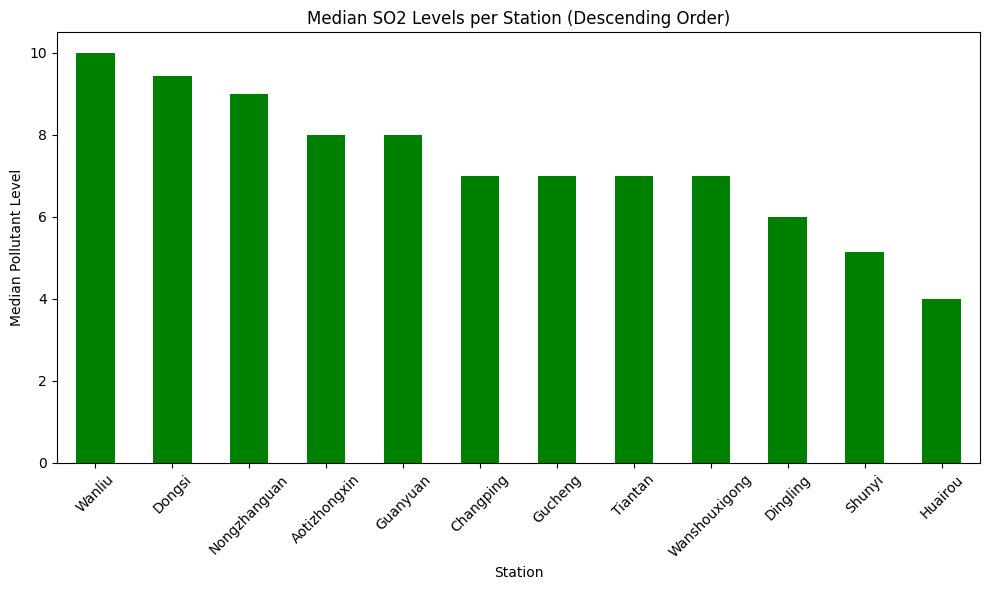

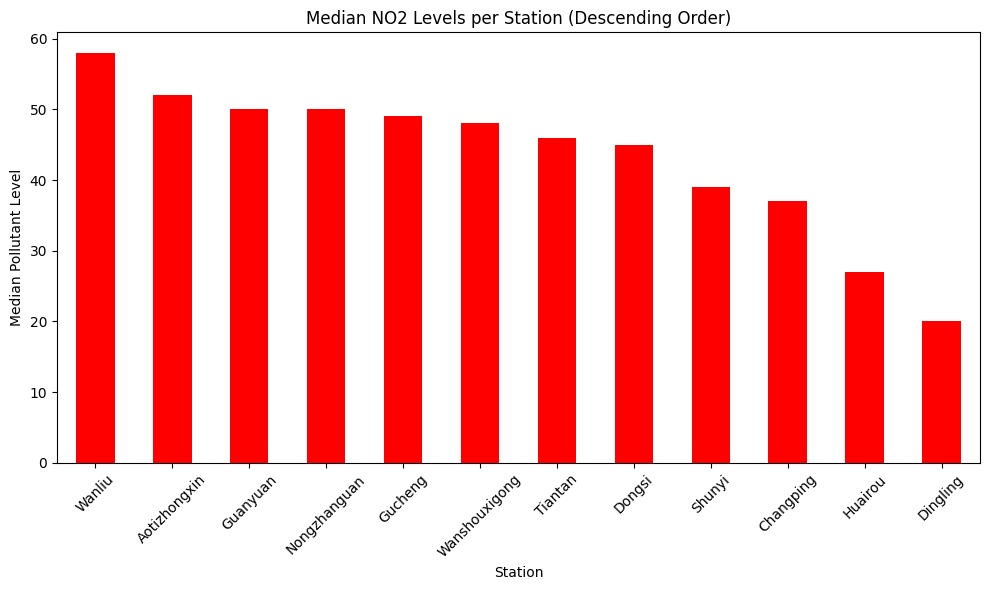

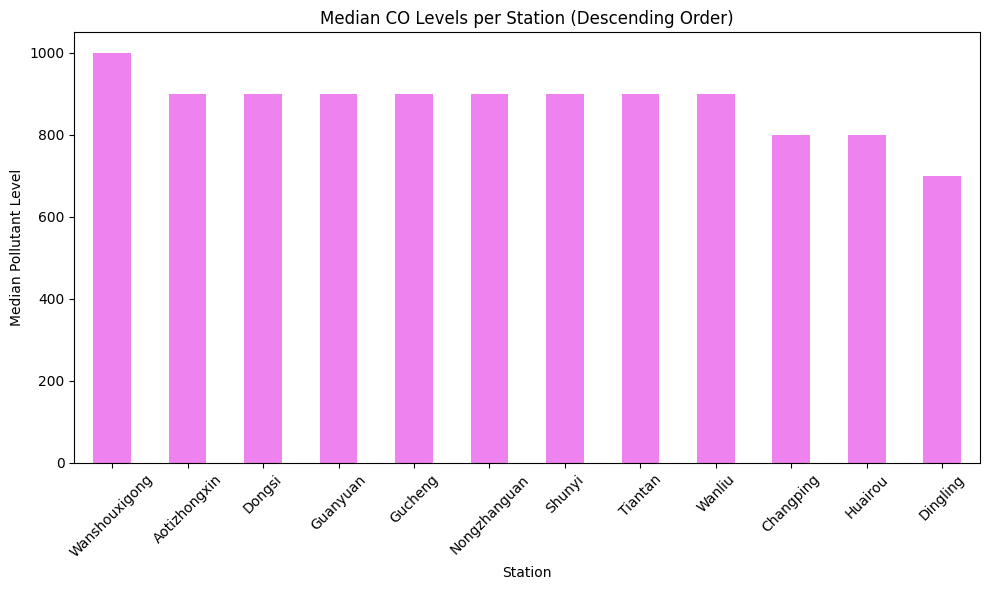

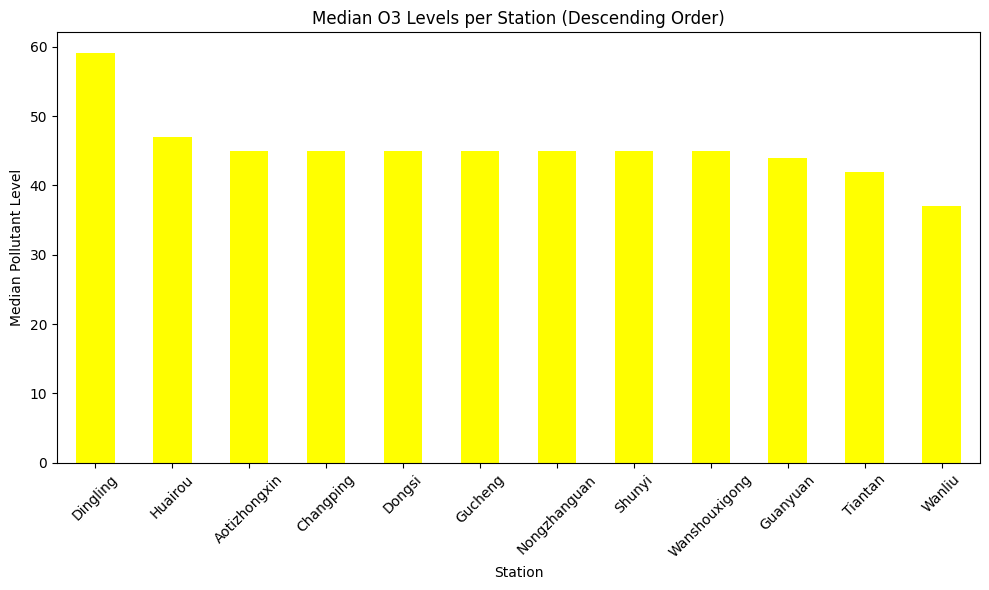

In [45]:
# Define colors for each pollutant
colors = ['skyblue', 'orange', 'green', 'red', 'violet', 'cyan']

# Create separate bar plots for each pollutant
for pollutant, color in zip(pollutant_columns, colors):
    # Sort median values in descending order
    sorted_median = median_pollutant_levels_per_station[pollutant].sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sorted_median.plot(kind='bar', color=color)
    plt.title(f'Median {pollutant} Levels per Station (Descending Order)')
    plt.xlabel('Station')
    plt.ylabel('Median Pollutant Level')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: What is the distribution of wind directions across all stations, and how does it correlate with pollutant levels?

> For each pollutants, we will visualize all the wind direction level

In [46]:
# Analyze the distribution of wind directions
wind_direction_distribution = df_all['wd'].value_counts(normalize=True)

# Analyze the mean pollutant levels for different wind directions
pollutants = ['PM2.5', 'PM10','SO2', 'NO2', 'CO', 'O3']
pollutant_levels_by_wd = df_all.groupby('wd')[pollutants].median()

wind_direction_distribution, pollutant_levels_by_wd

(NE     0.103855
 ENE    0.081698
 NW     0.078195
 N      0.073741
 E      0.070709
 SW     0.068342
 NNE    0.068244
 NNW    0.060855
 WNW    0.057930
 ESE    0.057561
 SSW    0.053623
 SE     0.047708
 WSW    0.047627
 S      0.046118
 SSE    0.042052
 W      0.041740
 Name: wd, dtype: float64,
      PM2.5   PM10   SO2   NO2      CO       O3
 wd                                            
 E     74.0  100.0   8.0  52.0  1100.0  33.0000
 ENE   69.0   94.0   8.0  58.0  1100.0  22.0000
 ESE   78.0  104.0   9.0  47.0  1100.0  45.0000
 N     37.0   59.0   5.0  39.0   700.0  41.0000
 NE    55.0   82.0   7.0  54.0   900.0  25.0000
 NNE   42.0   63.0   6.0  43.0   800.0  34.0578
 NNW   24.0   46.0   4.0  27.0   600.0  47.0000
 NW    21.0   45.0   4.0  26.0   500.0  50.0000
 S     69.0   97.0  10.0  41.0   900.0  74.3274
 SE    76.0  105.0  10.0  45.0  1000.0  52.0000
 SSE   74.0  104.0  10.0  42.0  1000.0  70.0000
 SSW   66.0   96.0  11.0  42.0   900.0  79.0000
 SW    60.0   94.0  10.0  43.

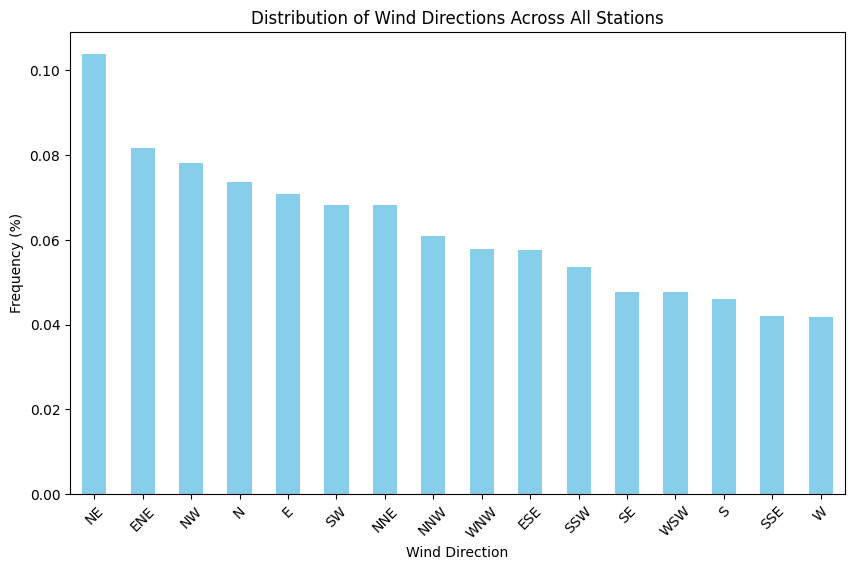

In [47]:
# Visualize the distribution of wind directions across all stations
wind_direction_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Distribution of Wind Directions Across All Stations')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45)
plt.show()

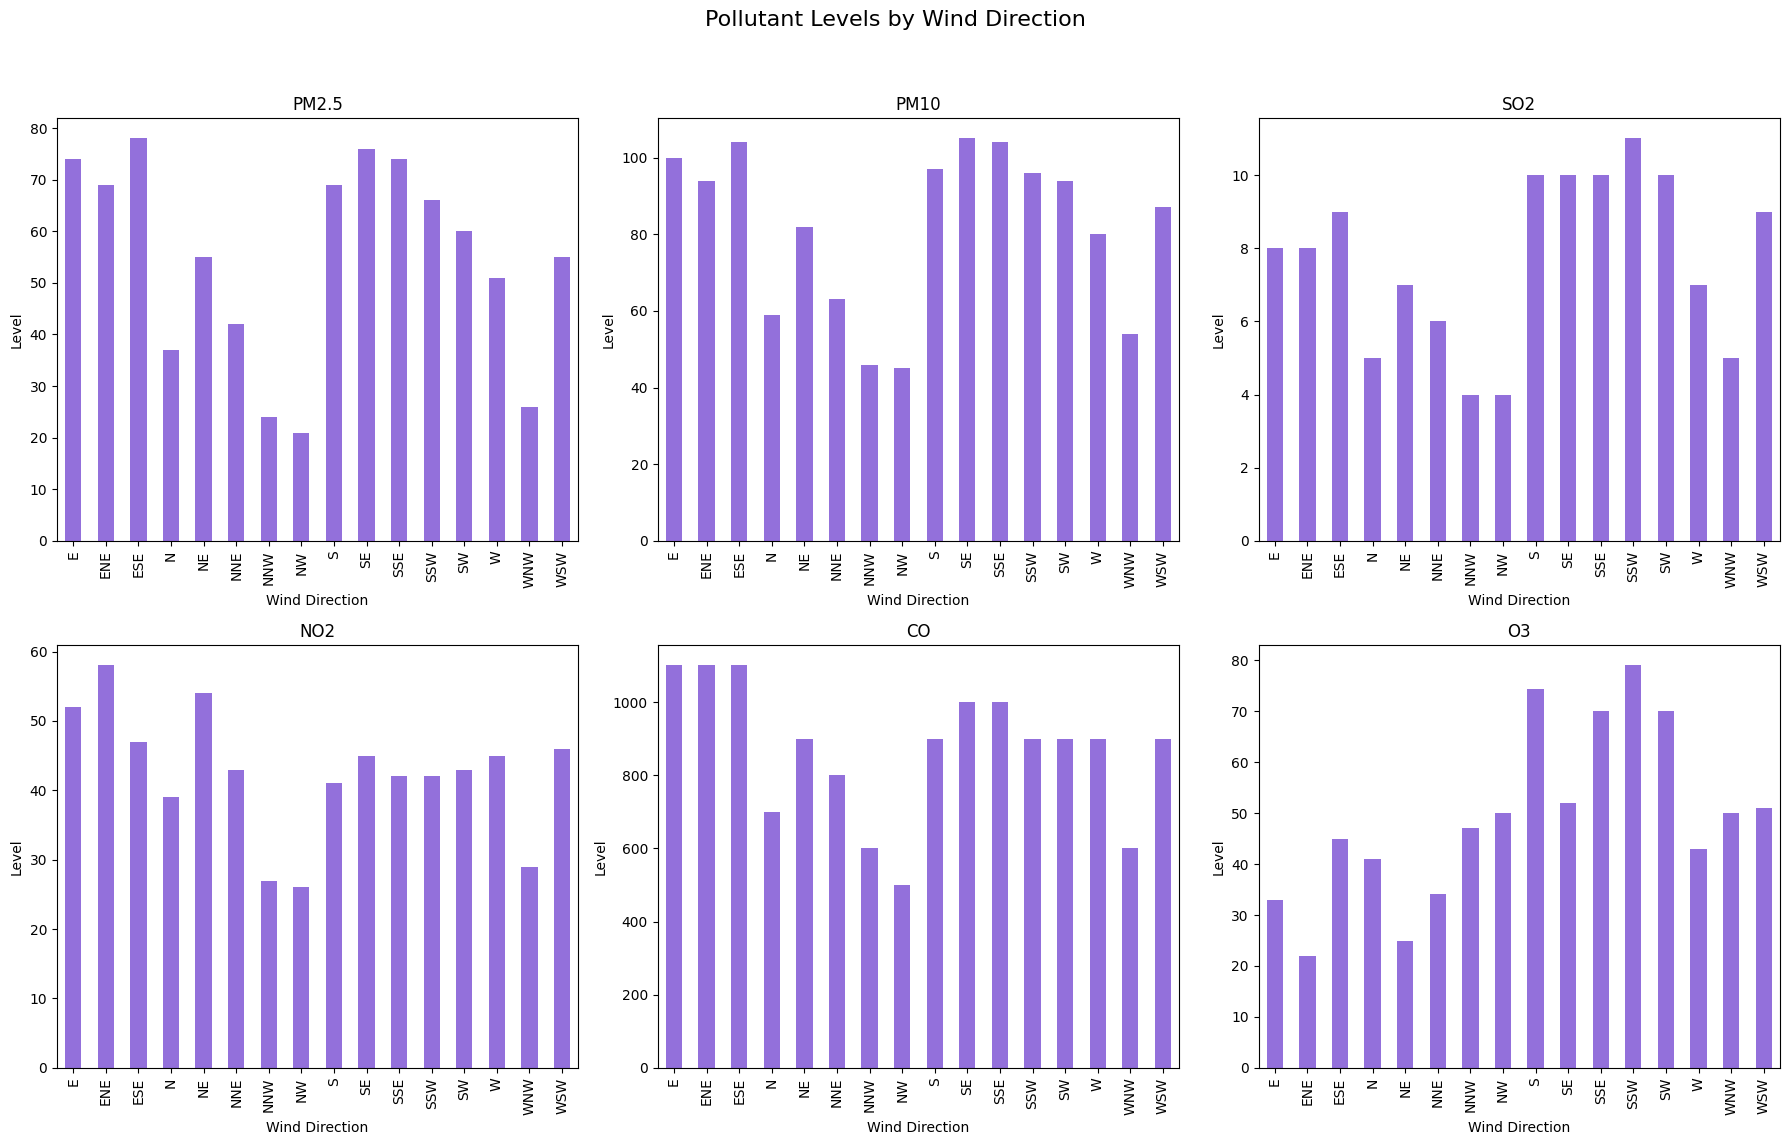

In [48]:
# Plotting the mean pollutant levels by wind direction
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Pollutant Levels by Wind Direction', fontsize=16)

for ax, pollutant in zip(axes.flatten(), pollutants):
    pollutant_levels_by_wd[pollutant].plot(kind='bar', ax=ax, color='mediumpurple')
    ax.set_title(pollutant)
    ax.set_xlabel('Wind Direction')
    ax.set_ylabel('Level')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Pertanyaan 3: Are there any notable trends or patterns in pollutant levels over different months (and visualize per hours)?

> For each pollutants, I sort per month and per month, we visualize per hours in that month.

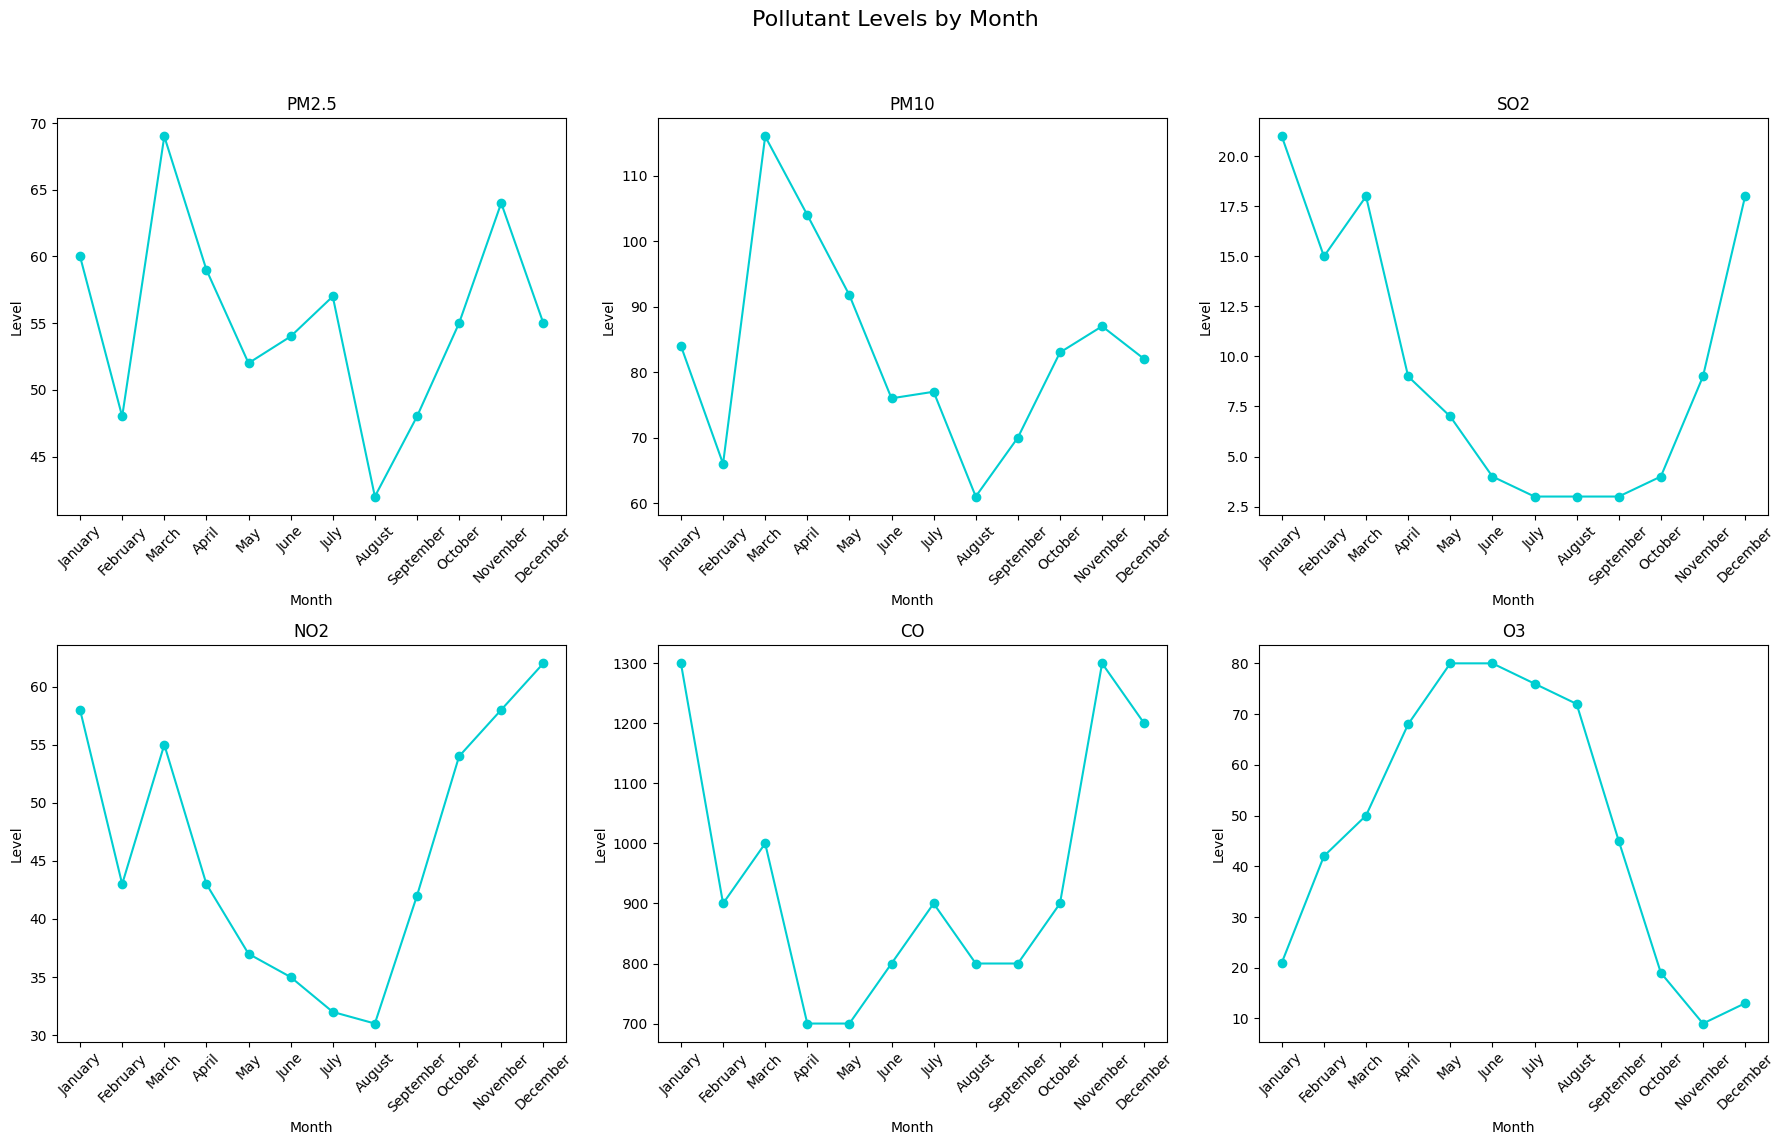

In [49]:
# Group data by month and calculate the mean pollutant levels
pollutant_levels_by_month = df_all.groupby('month')[pollutants].median()

# Plotting the mean pollutant levels by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Pollutant Levels by Month', fontsize=16)

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

for ax, pollutant in zip(axes.flatten(), pollutants):
    pollutant_levels_by_month[pollutant].plot(ax=ax, marker='o', linestyle='-', color='darkturquoise')
    ax.set_title(pollutant)
    ax.set_xlabel('Month')
    ax.set_ylabel('Level')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

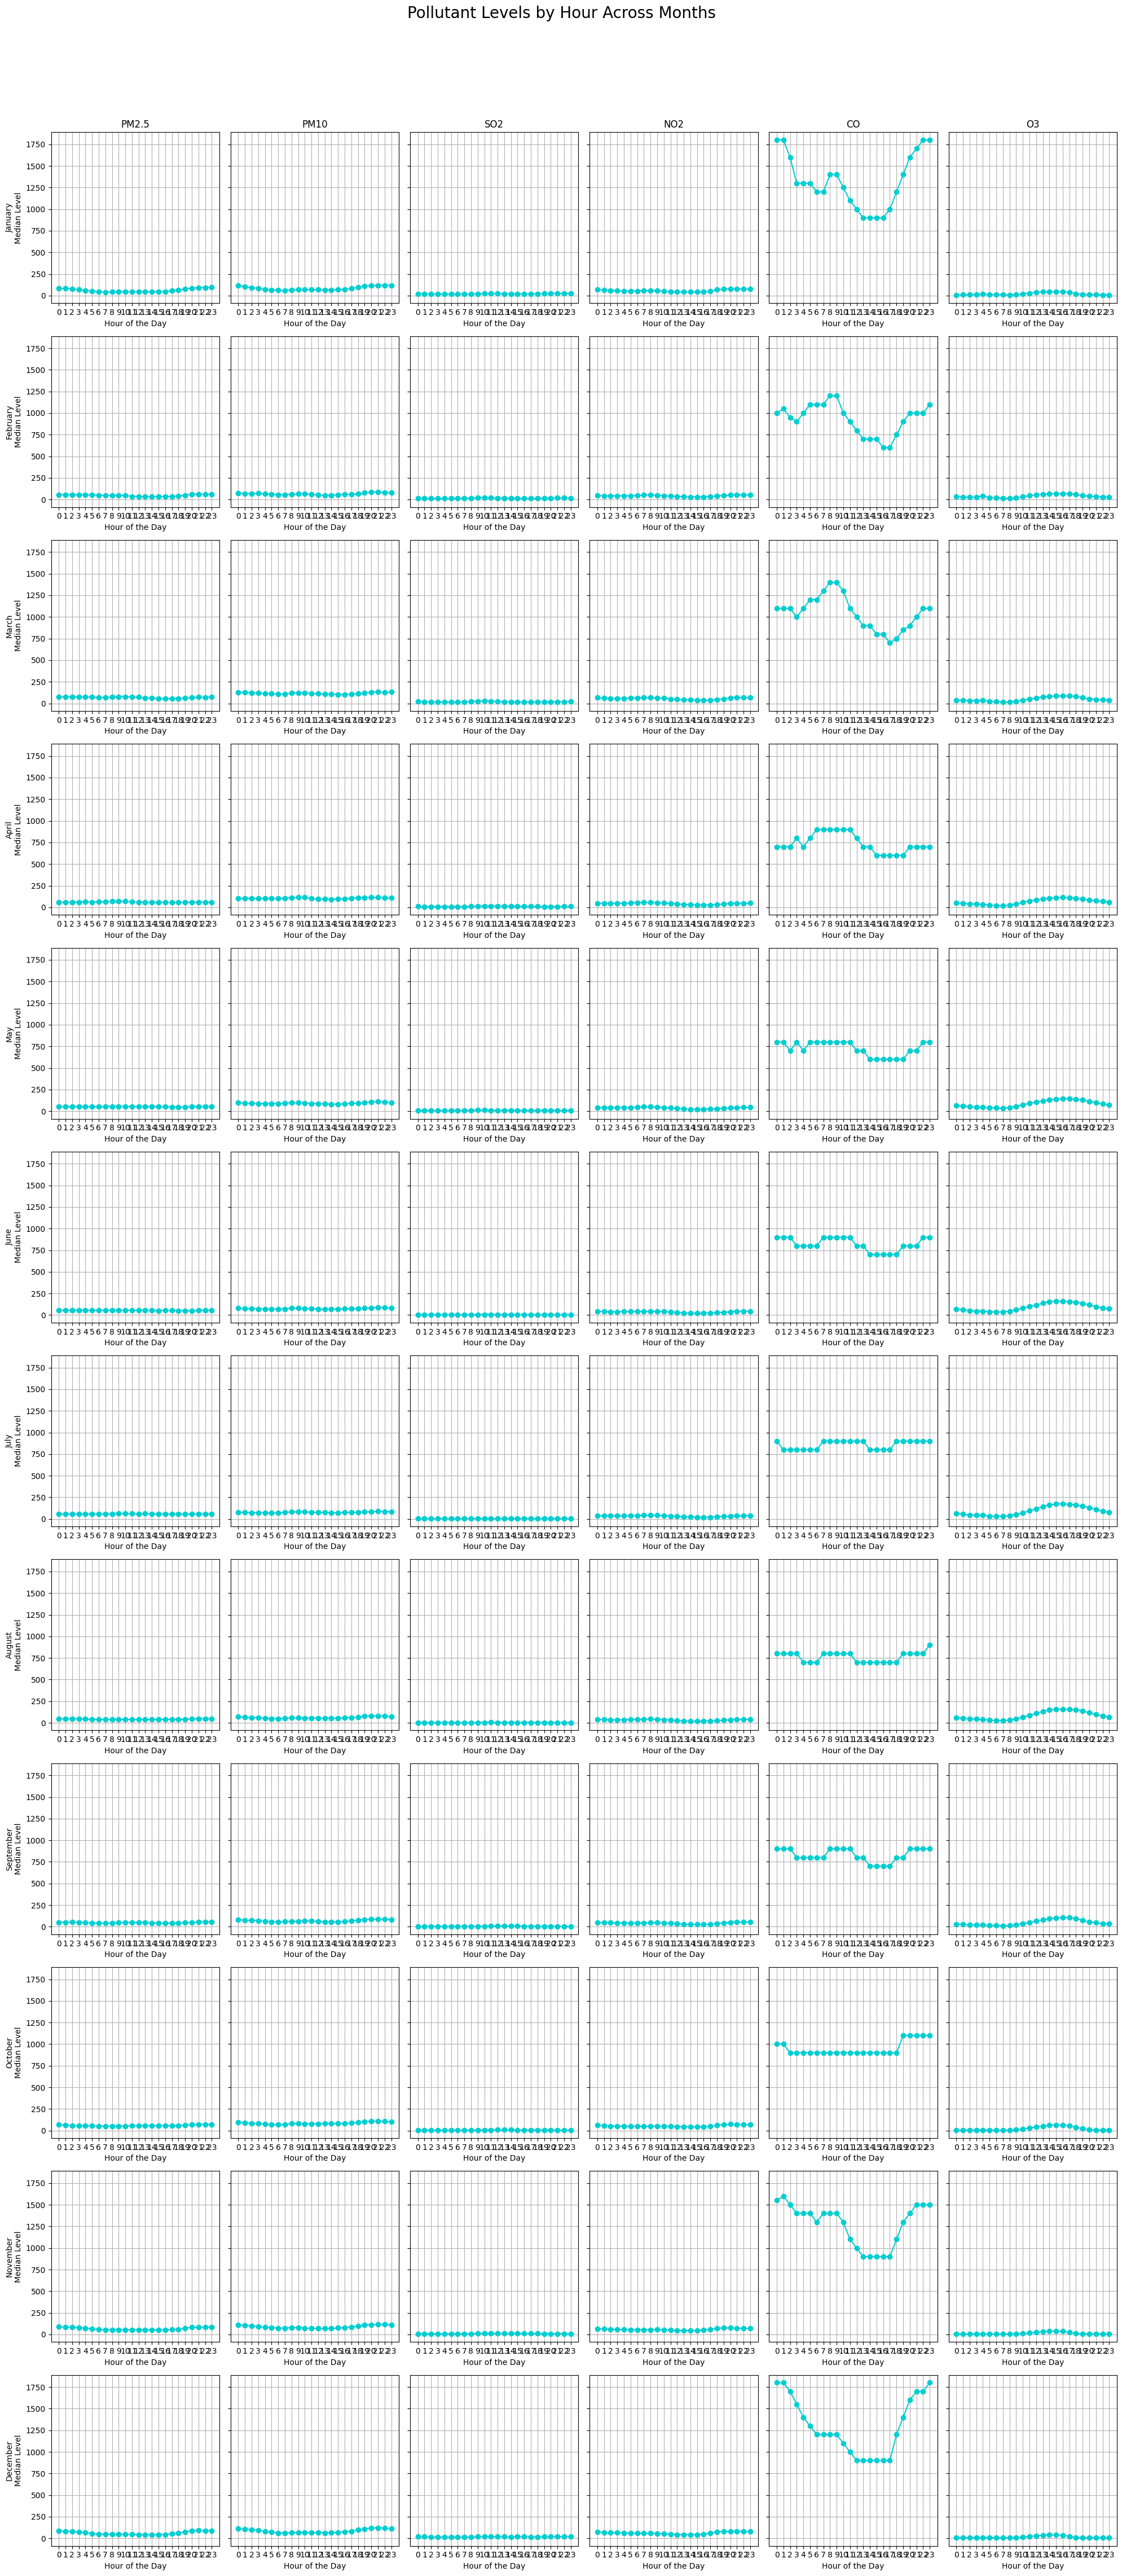

In [58]:
# First, ensure the DataFrame is grouped by both 'month' and 'hour' for median calculation
pollutant_levels_by_month_hour = df_all.groupby(['month', 'hour'])[pollutants].median().reset_index()

# Now, let's attempt to plot again, this time checking for data presence
fig, axes = plt.subplots(12, len(pollutants), figsize=(20, 48), sharey=True)
fig.suptitle('Pollutant Levels by Hour Across Months', fontsize=20)

for month_idx, month_name in enumerate(months, start=1):
    for pollutant_idx, pollutant in enumerate(pollutants):
        ax = axes[month_idx-1, pollutant_idx]
        # Filter data for the specific month
        month_data = pollutant_levels_by_month_hour[pollutant_levels_by_month_hour['month'] == month_idx]

        if not month_data.empty:
            ax.plot(month_data['hour'], month_data[pollutant], marker='o', linestyle='-', color='darkturquoise')

        if month_idx == 1:  # Only set title for the top row
            ax.set_title(pollutant)

        if pollutant_idx == 0:  # Only set y-label for the first column
            ax.set_ylabel(f'{month_name}\nMedian Level')

        ax.set_xlabel('Hour of the Day')
        ax.set_xticks(range(0, 24))
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Pertanyaan 4: What is the correlation between weather variables (e.g. temperature, pressure, humidity) and pollutant levels across all stations?

> Find correlation between weather variables and pollutant levels

In [54]:
# Define weather variables
weather_variables = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Calculate the correlation matrix between weather variables and pollutant levels
correlation_matrix = df_all[weather_variables + pollutants].corr()

# Extract the correlation values between weather variables and pollutants
correlation_weather_pollutants = correlation_matrix.loc[weather_variables, pollutants]

correlation_weather_pollutants


,PM2.5,PM10,SO2,NO2,CO,O3
TEMP,-0.130825,-0.095674,-0.318509,-0.273557,-0.318067,0.585811
PRES,0.019235,-0.017542,0.220741,0.171171,0.184148,-0.439053
DEWP,0.112726,0.069735,-0.264385,-0.030747,-0.056701,0.307427
RAIN,-0.014315,-0.026355,-0.039852,-0.043241,-0.012842,0.023322
WSPM,-0.269476,-0.182290,-0.107337,-0.393955,-0.288682,0.292592


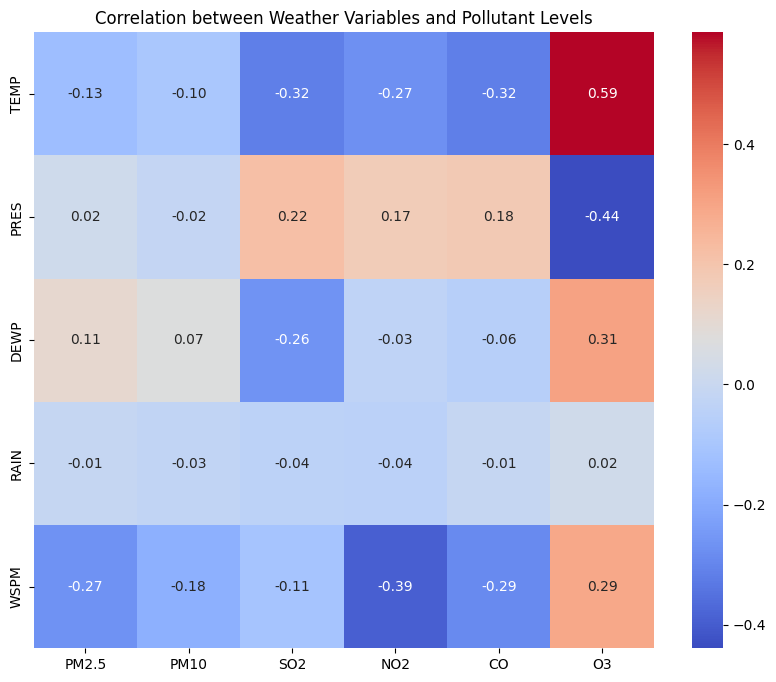

In [55]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_weather_pollutants, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weather Variables and Pollutant Levels')
plt.show()

## Conclusion

- Based on the first question, we can see that for pollutant:
  -  PM2.5 has high level at Dongshi Station
  -  PM10 has high level at Gucheng Station
  -  SO2 has high level at Wanliu Station
  -  NO2 has high level at Wanliu Station
  -  CO has high level at Wanshouxigong Station
  -  O3 has high level at Dingling Station
  <br>
  We know that every station have their dominated pollutant(s). But, it seems at Wanliu Station, it has high level SO2 and NO2. It can be high consideration for Wanliu Station to decrease the pollutants level, especially for SO2 and NO2.
- Next to question number 2, we can see that for pollutant:
  -  PM2.5 has high level from ESE (east-southeast) direction
  -  PM10 has high level from SE (southeast) direction
  -  SO2 has high level from SSW (south-southwest) direction
  -  NO2 has high level from ENE (east-northeast) direction
  -  CO has high level from E (east) direction
  -  O3 has high level from ESE SSW (south-southwest) direction
  <br>
  We can see that most likely he wind direction is slightly inclined to the east and south have high level pollutants.
- Based on the answer of question number 3, we can see for each pollutants in each months, there are certain hours when the pollutants level increase or decreased dramatically. If we see level of CO that looks higher than other, it can be the level of CO2 throughout the year was that high or it has its measurement that makes it higher than others.
- Lastly fro question number 4, temperature (TEMP) has positively moderate correlation with O3, but it's the biggest number of correlation of all (0.59). And pressure (PRES) has negatively correlation with O3. Between TEMP and PRES have opposite correlation. In physics, we know that temperature and pressure have an inverse relationship. You can see it from ideal gass concept `PV = nRT` where `P = PRES` and `T = TEMP`.